<a href="https://colab.research.google.com/github/FadhilRisandi/Machine_Learning_2022/blob/main/UAS_Machine_Learning_H071201082_Fadhil%20Risandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAMA : Andi Fadhil Risandi Kresna
# NIM : H071201082


**Heart Disease Prediction Using Logistic Regression**

# Input Variable
sex : male or female (Nominal)

age : age of the patient (Continuous)

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal) prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

In [1228]:
# Data Loading and Numerical Operations
import numpy as np
import pandas as pd

# Data Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Data Resampling
from sklearn.utils import resample

# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Data Scaling
from sklearn.preprocessing import StandardScaler

# Data Splitting
import sklearn.model_selection as ms

# Data Modeling
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


## Read the file and Display

In [1229]:
df1= pd.read_csv('/content/framingham.csv')
df1.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## EDA


In [1230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [1231]:
df1.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [1232]:
df1.shape

(4238, 16)

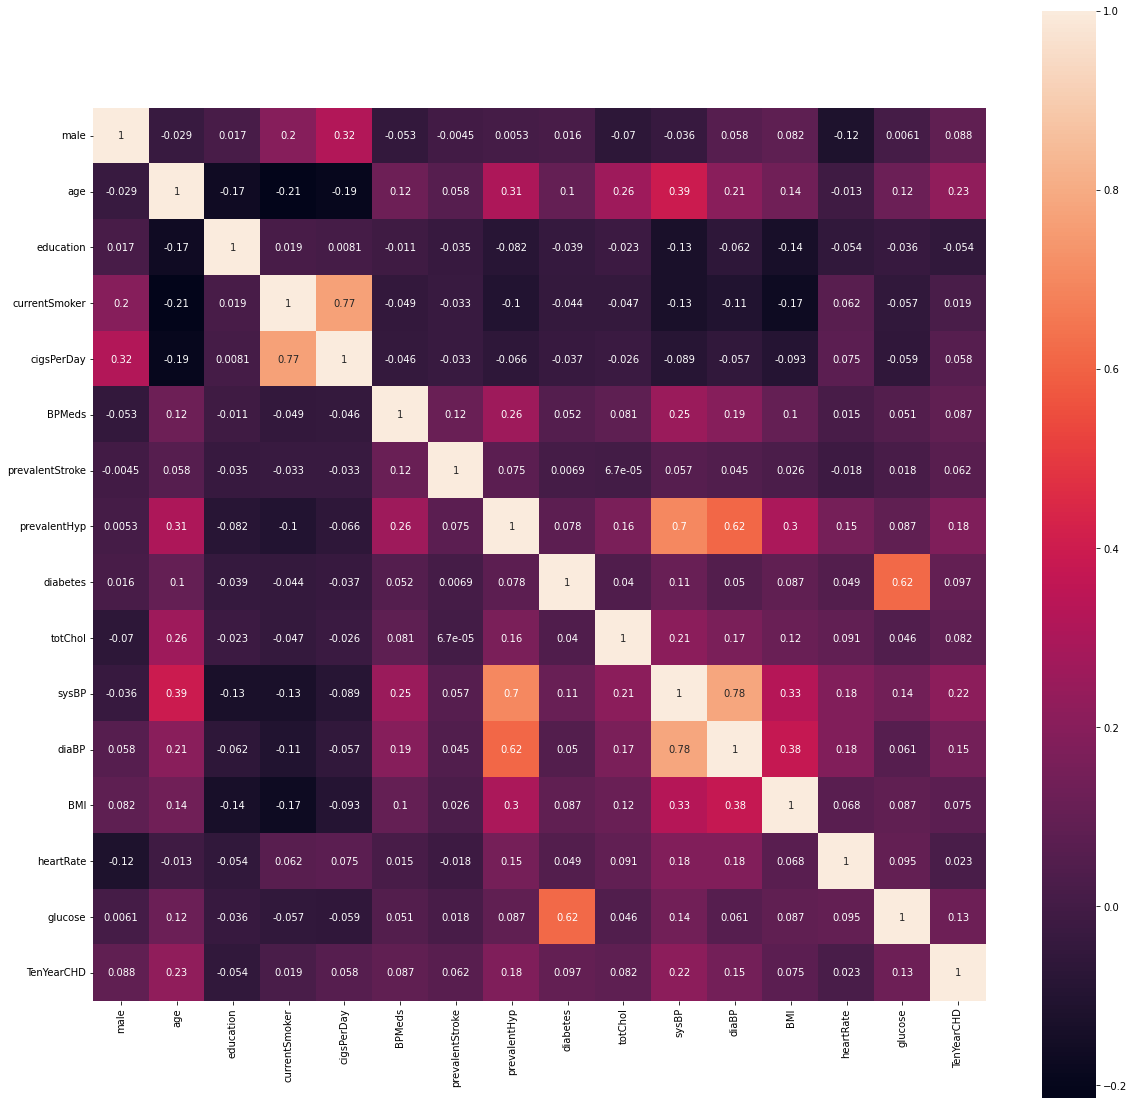

In [1233]:
# Show Correlation
corrmat =  df1.corr()
plt.figure(figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

- sysBP dan diaBP,currentSmoker dan cigsPerDay berkorelasi tinggi dengan nilai sekitar 0,8
- sysBP dan diaBP dan prevalensi Hip, diabetes dan glukosa berkorelasi sampai batas tertentu dengan nilai sekitar 0,62

In [1234]:
# Dropping education because have minus correlation and rename male to Sex
df1.drop(['education', ], inplace = True, axis = 1)
df1.rename(columns ={'male':'Sex'}, inplace = True)

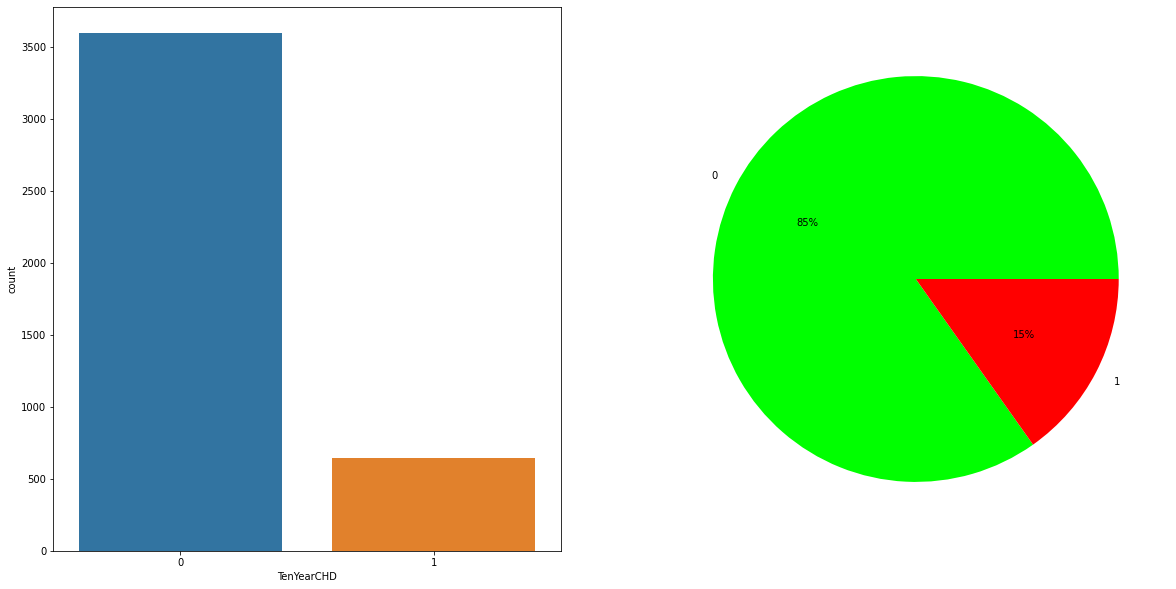

In [1235]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.countplot(x='TenYearCHD',data=df1)

plt.subplot(122)
labels=[0,1]
plt.pie(df1["TenYearCHD"].value_counts(),autopct="%.0f%%",labels=labels,colors=["lime","red"])

plt.show()

- Distribusinya sangat tidak seimbang. jumlah kasus negatif lebih banyak daripada jumlah kasus positif. Ini akan menyebabkan masalah ketidakseimbangan kelas saat menyesuaikan model. Oleh karena itu, masalah ini perlu ditangani dan diurus. Salah satu masalah utama saat menangani kumpulan data yang tidak seimbang terkait dengan metrik yang digunakan untuk mengevaluasi model. Menggunakan metrik yang lebih sederhana seperti akurasi_skor bisa menyesatkan. Dalam kumpulan data dengan kelas yang sangat tidak seimbang, jika pengklasifikasi selalu "memprediksi" kelas yang paling umum tanpa melakukan analisis fitur apa pun, itu akan tetap memiliki tingkat akurasi yang tinggi.

In [1236]:
categorical_features = ['Sex','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [1237]:
for feature in categorical_features:
    print(feature,':')
    print(df1[feature].value_counts())
    print("-----------------")

Sex :
0    2419
1    1819
Name: Sex, dtype: int64
-----------------
currentSmoker :
0    2144
1    2094
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    4061
1.0     124
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    4213
1      25
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2922
1    1316
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    4129
1     109
Name: diabetes, dtype: int64
-----------------


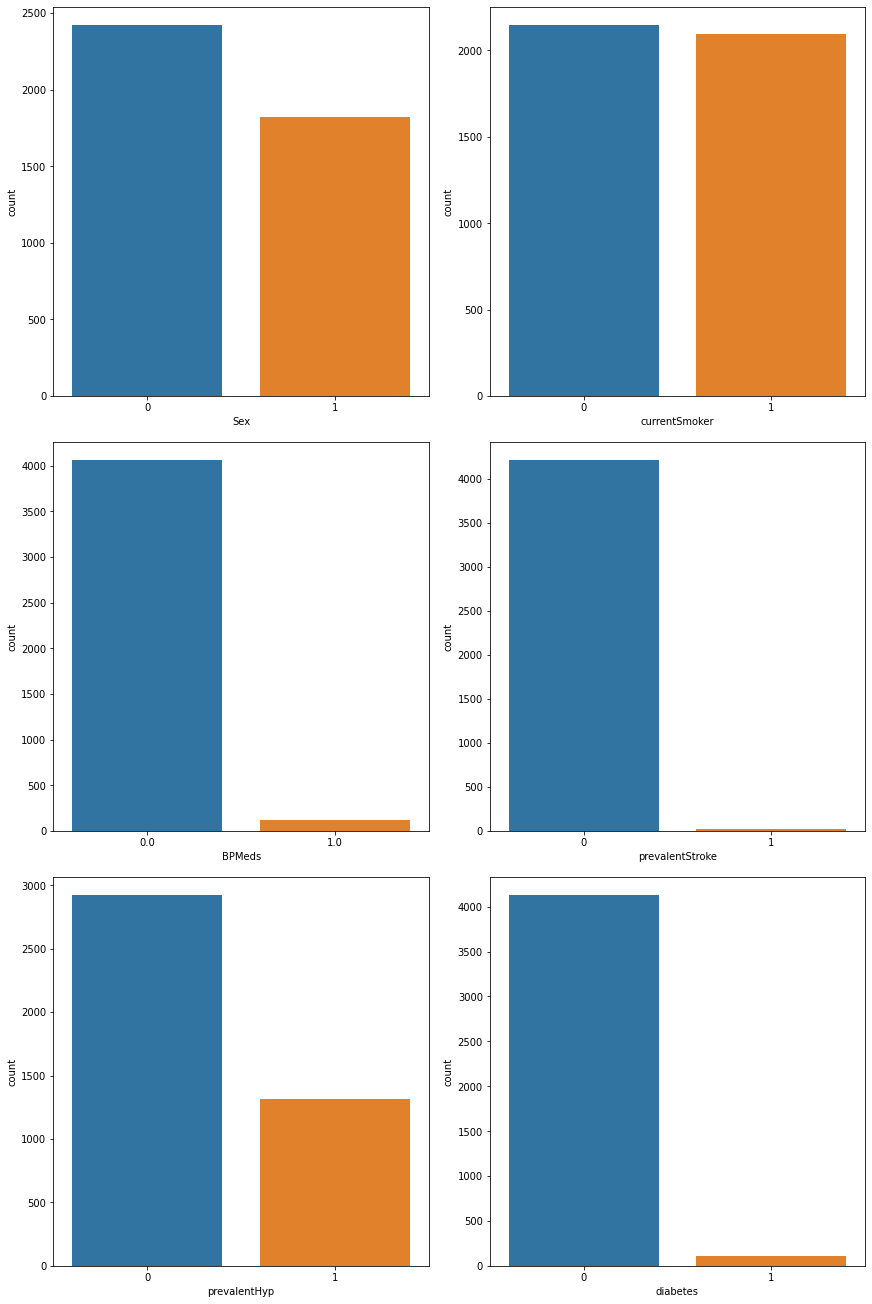

In [1238]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(6*total_cols, 6*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df1, ax=axs[row][pos])

- BPmeds, prevalentStroke and diabetes sangat tidak seimbang.
- Jumlah Smokers and non-Smokers di currentSmoker hampir sama


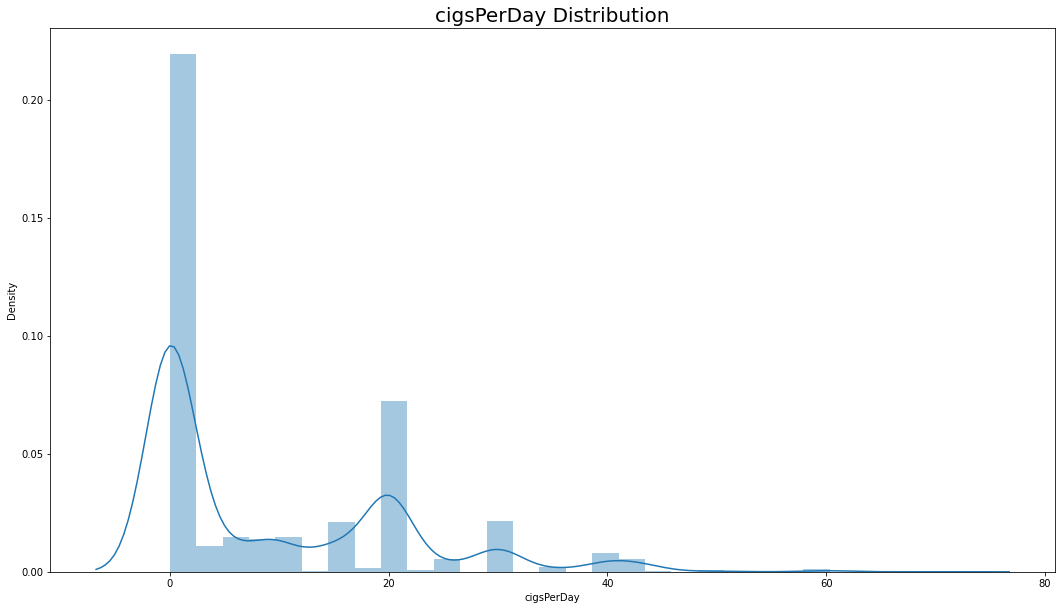

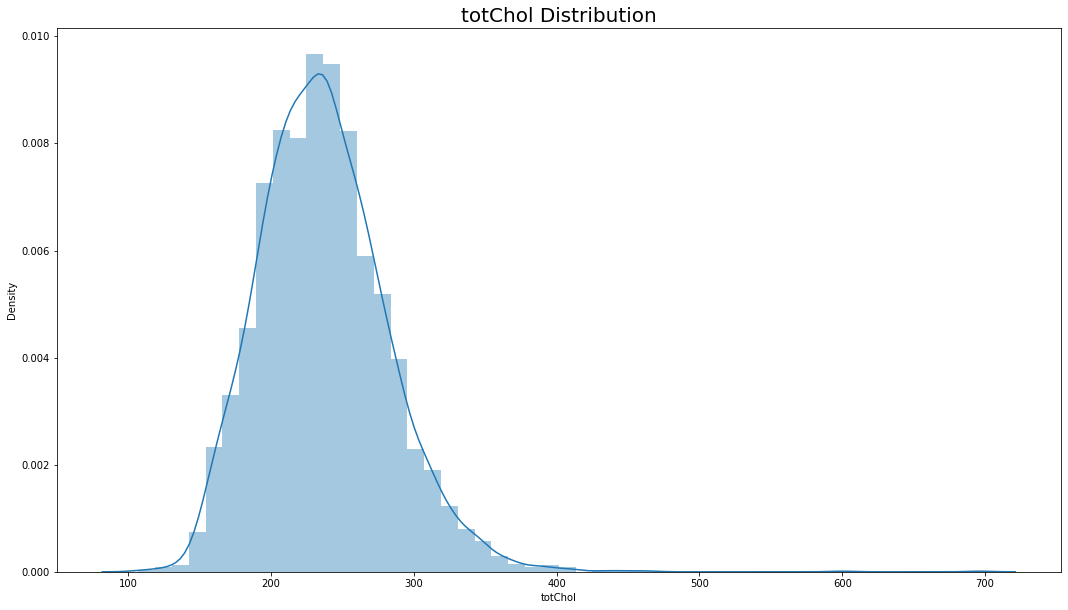

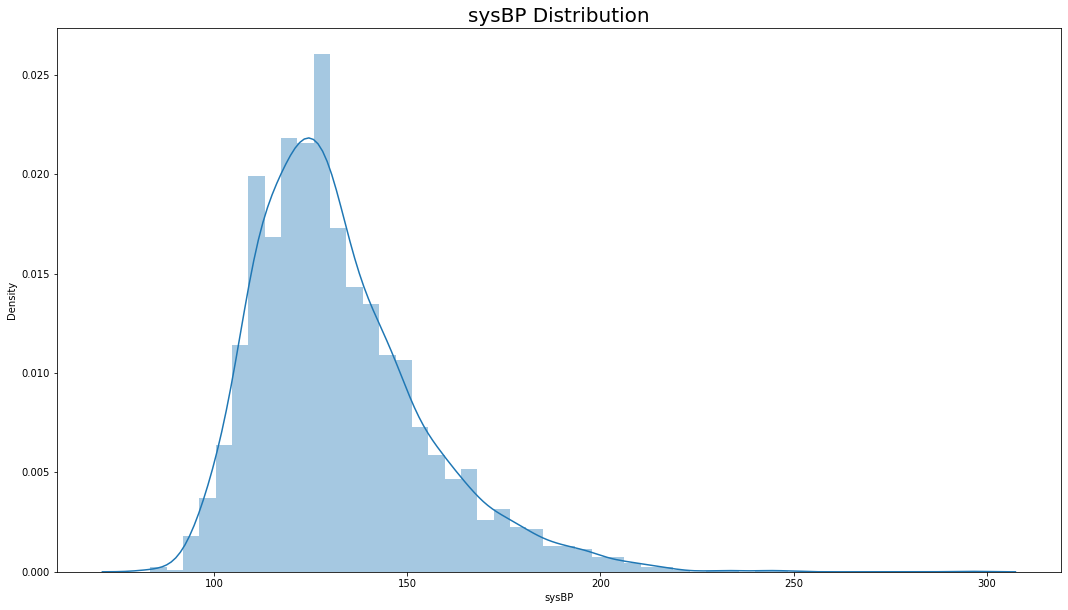

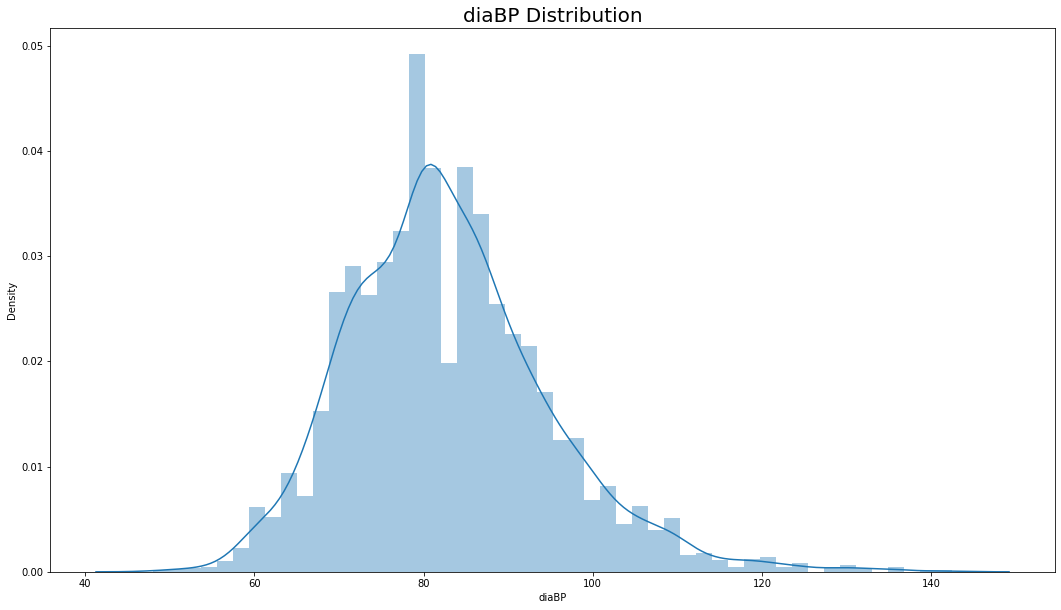

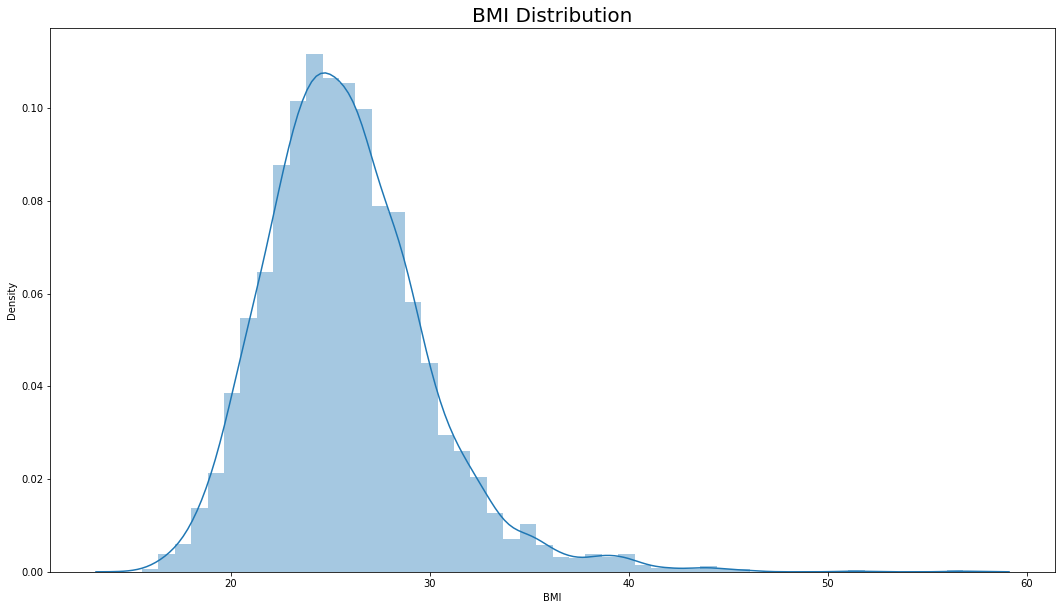

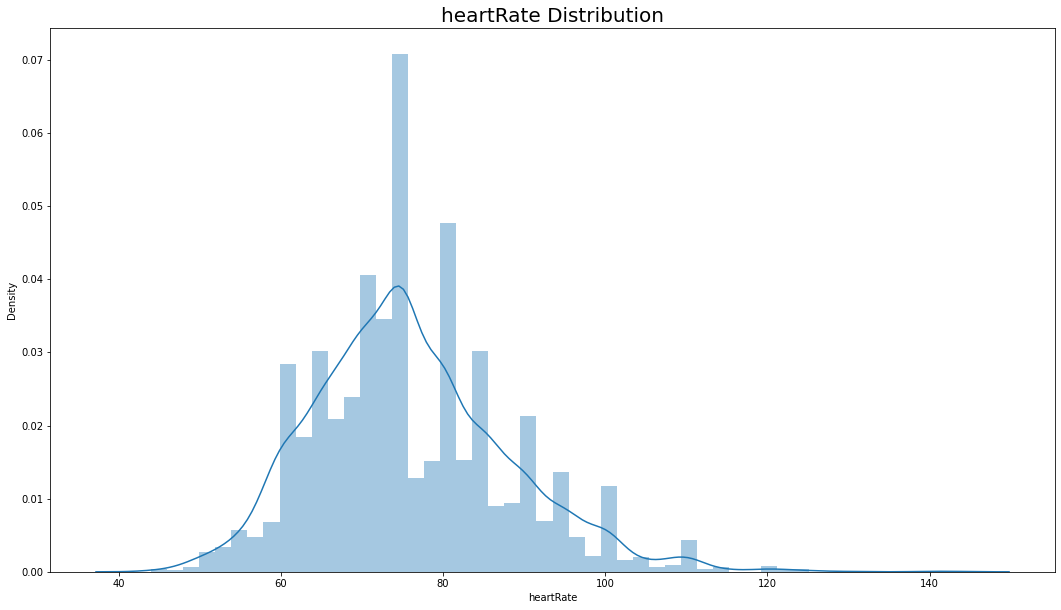

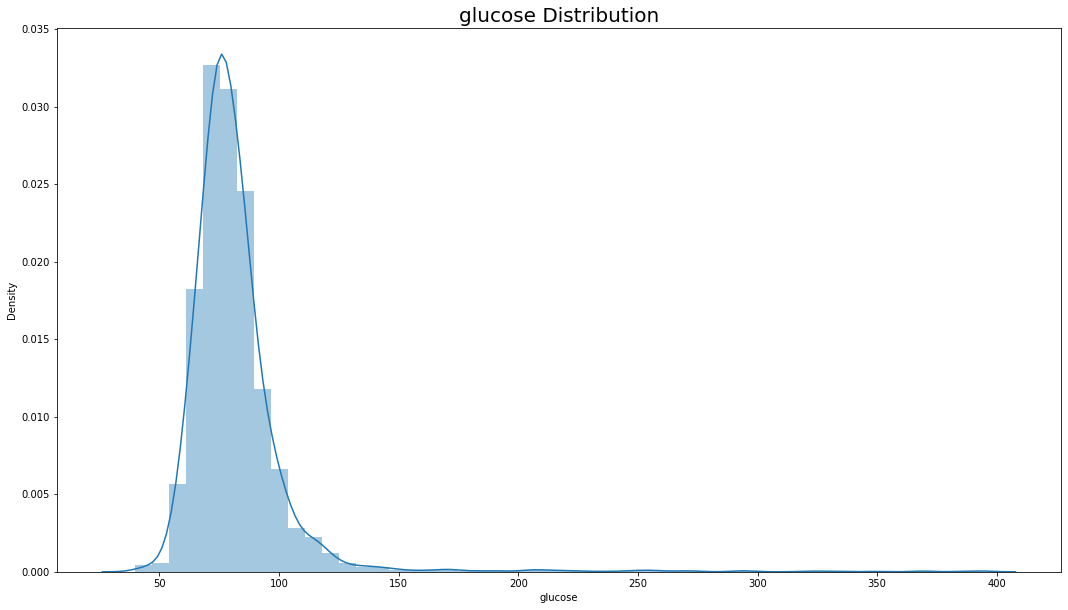

In [1239]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df1[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

- totChol, sysBP, diaBPand BMI memiliki distribusi yang seragam dan sisanya tidak merata
- cigsPerDay memiliki distribusi yang sangat tidak merata dengan sebagian besar data hadir dalam 0
- cigsPerDay and sysBP masing-masing menunjukkan sedikit dan sedikit kemiringan kanan.
- The majority portions of the following columns lie in the range:
-- totChol: 150 to 300
-- sysBP: 100 to 150
-- diaBP: 60 to 100
-- BMI: 20 to 30
-- heartRate: 50 to 100
-- glucose: 50 to 150

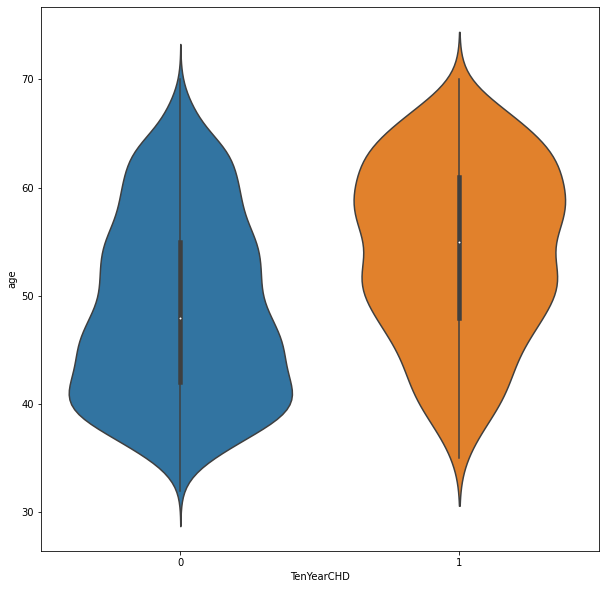

In [1240]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=df1)

- Kebanyakan pasien usia sekitar 40-55 memiliki 0 risiko

- Sebagian besar pasien dengan usia sekitar 60-65 memiliki risiko penyakit CHD

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

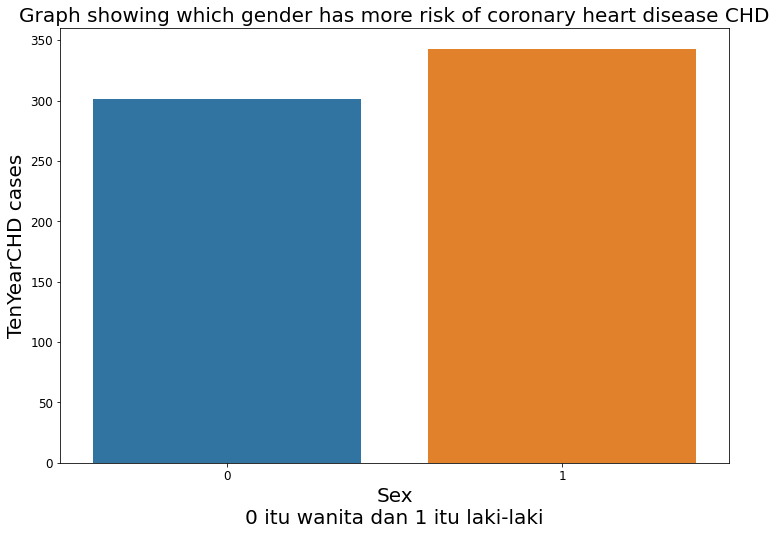

In [1241]:
graph_1 = df1.groupby('Sex', as_index=False).TenYearCHD.sum()
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_1['Sex'], y=graph_1['TenYearCHD'])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Sex\n0 itu wanita dan 1 itu laki-laki",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Laki-laki berisiko lebih tinggi terkena CHD

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

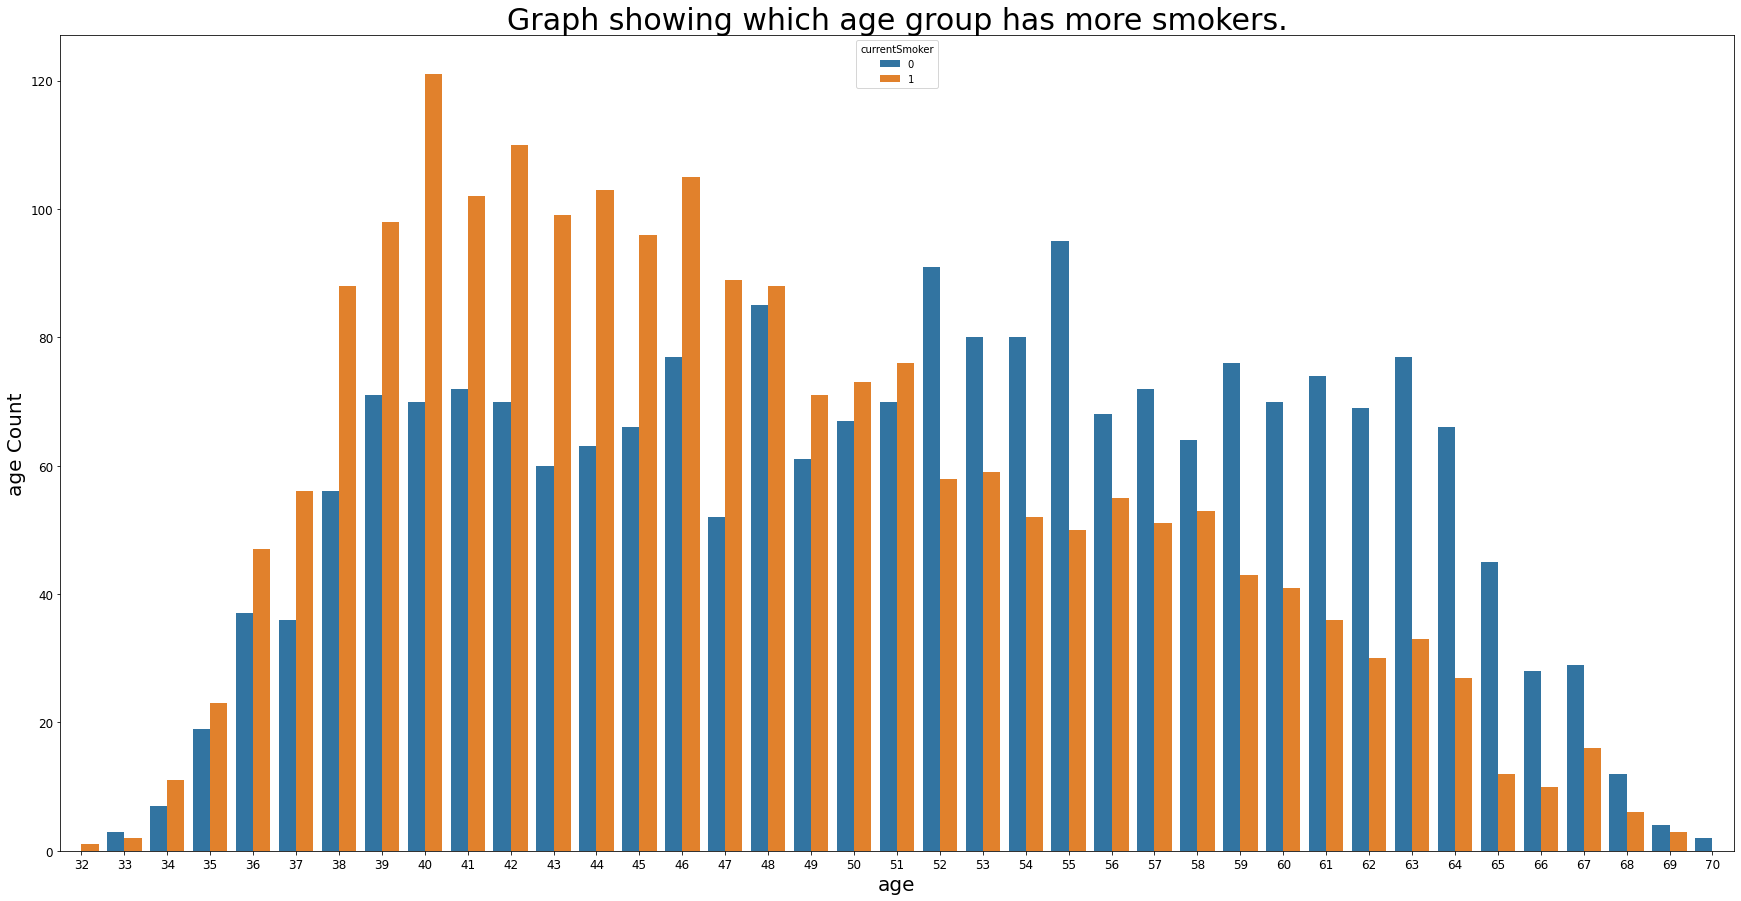

In [1242]:
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df1,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Kita dapat melihat bahwa kelompok usia pertengahan yang mana mulai dari usia 38 – 46 memiliki lebih banyak jumlah perokok saat ini 
- Tidak ada perokok saat ini yang diamati di bawah usia 32 tahun
- usia maksimum untuk Perokok saat ini adalah 70 tahun

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

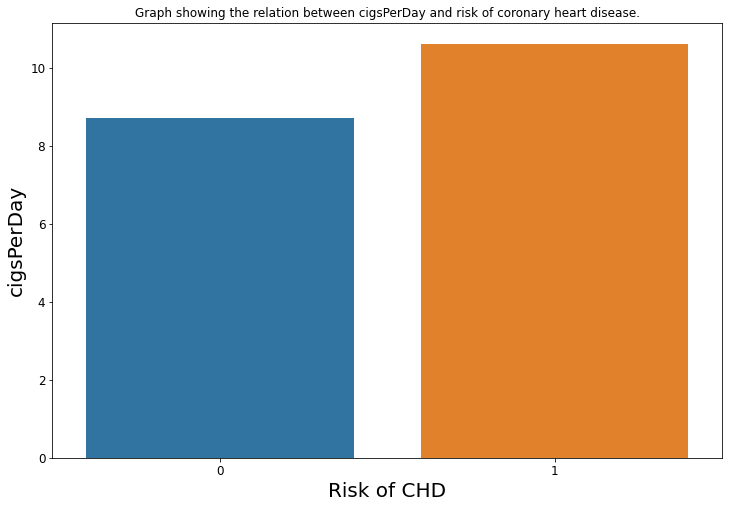

In [1243]:
graph= df1.groupby("TenYearCHD", as_index=False).cigsPerDay.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph["TenYearCHD"], y=graph["cigsPerDay"])
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.")
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Semakin banyak rokok yang mereka hisap, semakin tinggi kemungkinan terkena CHD
- Tetapi aneh bahwa pasien yang tidak merokok menderita CHD

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

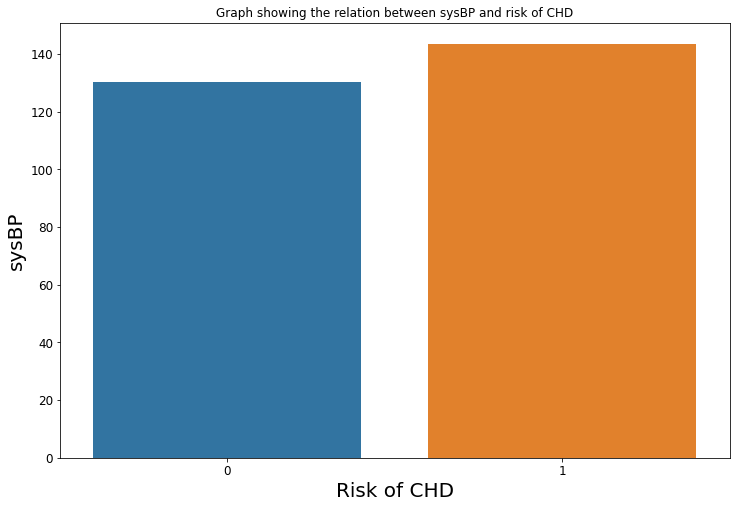

In [1244]:
graph_2 = df1.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_2["TenYearCHD"], y=graph_2["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD")
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Pasien yang memiliki sysBP lebih tinggi memiliki peluang lebih tinggi resiko terkena tenYearCHD
- Pasien yang sysBP sekitar 120 kebanyakan aman

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

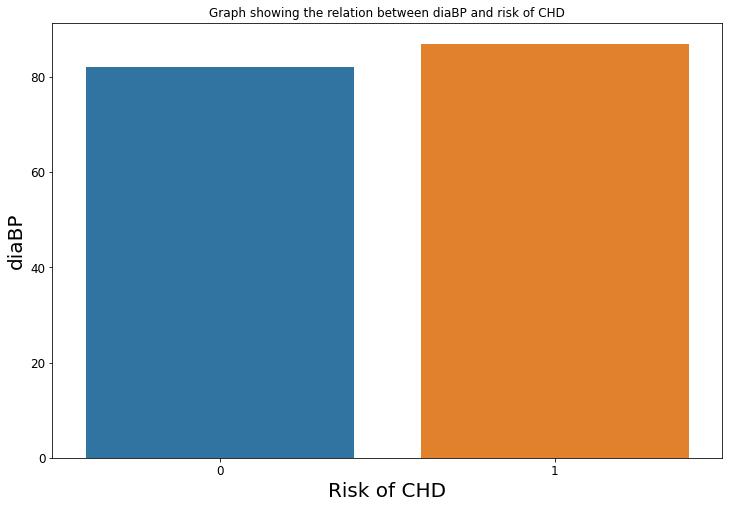

In [1245]:
graph_3 = df1.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD")
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Pasien yang memiliki diaBP lebih tinggi memiliki kemungkinan lebih tinggi resiko terkena CHD
- Pasien yang diaBP sekitar 75-80 kebanyakan aman

## Data Preprocessing

In [1246]:
# check for dupicates
df1.duplicated().sum()

0

In [1247]:
# Check if there is null values
missing_values_count = df1.isnull().sum()
print(missing_values_count)

Sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [1248]:
# Handle Missing Value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

new_df1 = pd.DataFrame(imputer.fit_transform(df1))
new_df1.columns = df1.columns
new_df1.index = df1.index

In [1249]:
new_df1.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [1250]:
df1 = new_df1.copy()

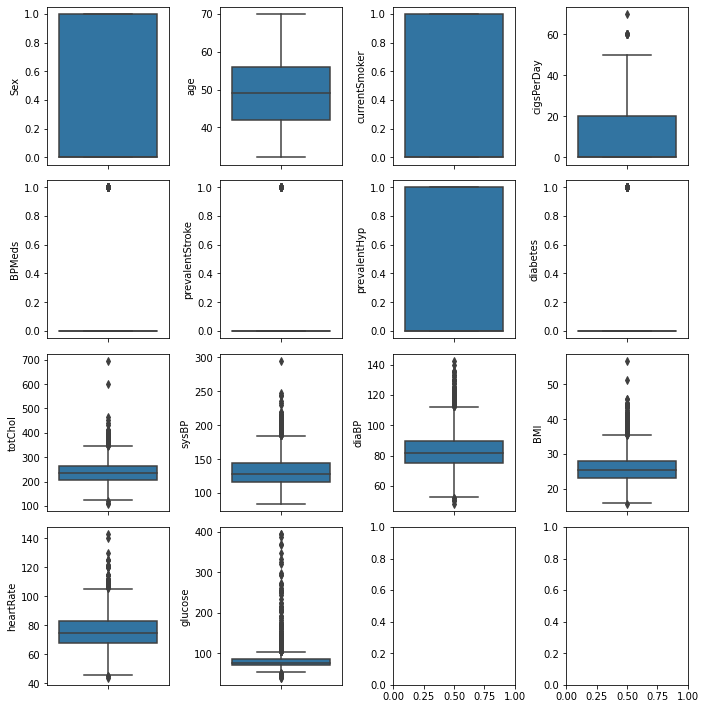

In [1251]:
fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df1.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==14:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

- Removable Outlier terdeteksi di kolom totChol, sysBP, BMI, heartRate, glucose dari dataset. 

In [1252]:
print('totChol  : ', df1['totChol'].max())
print('sysBP    : ', df1['sysBP'].max())
print('BMI      : ', df1['BMI'].max())
print('heartRate: ', df1['heartRate'].max())
print('glucose  : ', df1['glucose'].max())

totChol  :  696.0
sysBP    :  295.0
BMI      :  56.8
heartRate:  143.0
glucose  :  394.0


In [1253]:
# Handling Outliers
print('Number of training examples to be deleted for outliers removal is ',len(df1[df1['sysBP'] > 220]) + len(df1[df1['BMI'] > 43]) + len(
    df1[df1['heartRate'] > 125]) + len(df1[df1['glucose'] > 200]) + len(
    df1[df1['totChol'] > 450]))


Number of training examples to be deleted for outliers removal is  60


In [1254]:
# deleting outliers

df1 = df1[~(df1['sysBP'] > 220)]
df1 = df1[~(df1['BMI'] > 43)]
df1 = df1[~(df1['heartRate'] > 125)]
df1 = df1[~(df1['glucose'] > 200)]
df1 = df1[~(df1['totChol'] > 450)]
print(df1.shape)

(4180, 15)


After removing Outliers


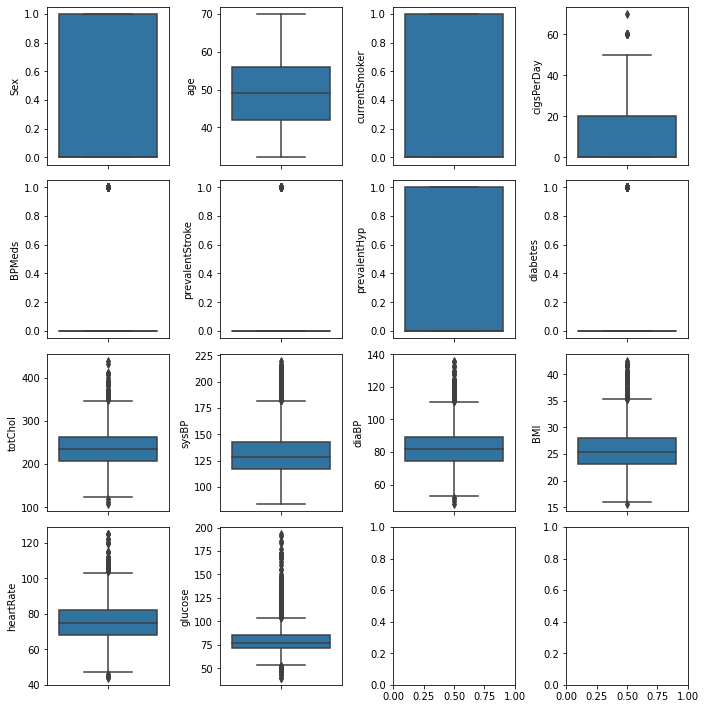

In [1255]:
fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
ax = ax.flatten()


print("After removing Outliers")
i = 0
for k,v in df1.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==14:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

After removing Outliers


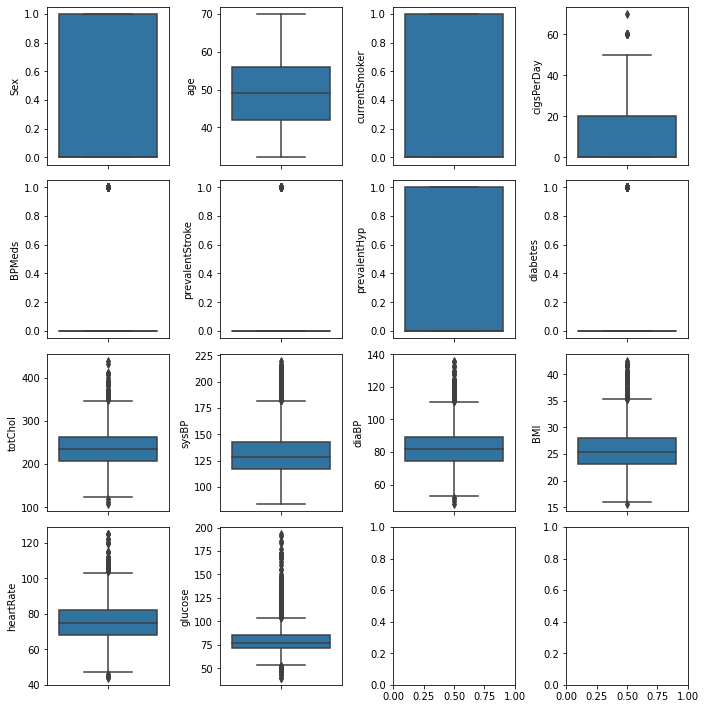

In [1256]:
fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
ax = ax.flatten()


print("After removing Outliers")
i = 0
for k,v in df1.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==14:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

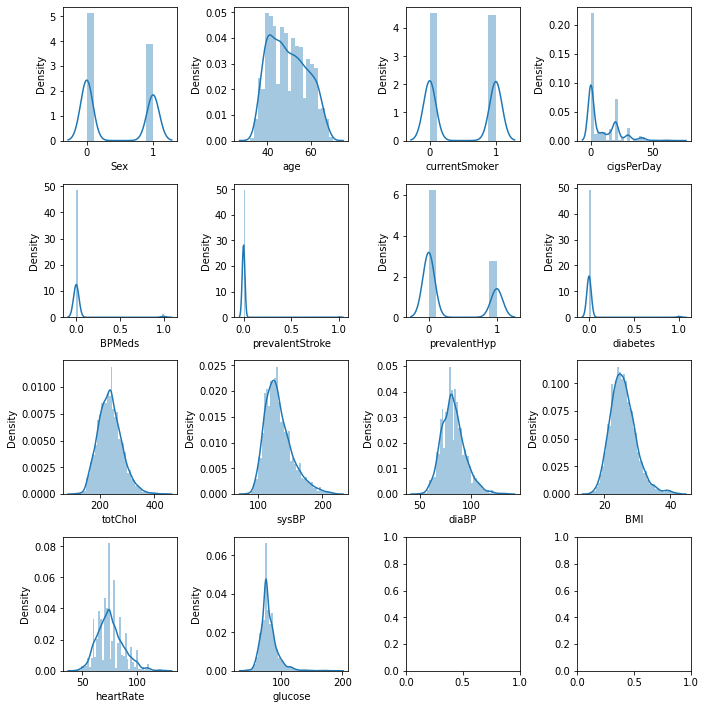

In [1257]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df1.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==14:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

- Kita perlu melakukan Fitur Scaling ketika kita berurusan dengan Gradient Descent Based algorithms (Regresi Linier dan Logistik, Jaringan Neural) dan Distance-based algorithms (KNN, K-means, SVM) karena ini sangat sensitif terhadap rentang titik data.

In [1258]:
# Standardise some features
scaler = StandardScaler()
cols_to_standardise = numeric_features
df1[cols_to_standardise] = scaler.fit_transform(df1[cols_to_standardise])

In [1259]:
df1.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,-0.753879,0.0,0.0,0.0,0.0,-0.959027,-1.221126,-1.093598,0.321867,0.357433,-0.192421,0.0
1,0.0,46.0,0.0,-0.753879,0.0,0.0,0.0,0.0,0.316207,-0.512683,-0.146628,0.771969,1.619884,-0.263137,0.0
2,1.0,48.0,1.0,0.923503,0.0,0.0,0.0,0.0,0.200277,-0.205691,-0.232716,-0.094989,-0.063384,-0.687430,0.0
3,0.0,61.0,1.0,1.762194,0.0,0.0,1.0,0.0,-0.263445,0.856973,1.058607,0.733608,-0.905019,1.646186,1.0
4,0.0,46.0,1.0,1.175110,0.0,0.0,0.0,0.0,1.127719,-0.087618,0.111637,-0.667846,0.778250,0.373304,0.0


## Feature Selection

In [1260]:
X=df1.iloc[:,0:14]
y=df1.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (4180, 14) 
y -  (4180,)


In [1261]:
best=SelectKBest(score_func=f_classif, k=10)
fit=best.fit(X,y)

In [1262]:
df1_scores=pd.DataFrame(fit.scores_)
df1_columns=pd.DataFrame(X.columns)

In [1263]:
scores=pd.concat([df1_columns,df1_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

            Feature       Score
1               age  216.156317
9             sysBP  188.237610
6      prevalentHyp  124.711516
10            diaBP   82.049690
0               Sex   36.430203
4            BPMeds   22.837507
8           totChol   22.136850
3        cigsPerDay   17.031145
11              BMI   15.379007
5   prevalentStroke   15.298915
13          glucose   10.263915


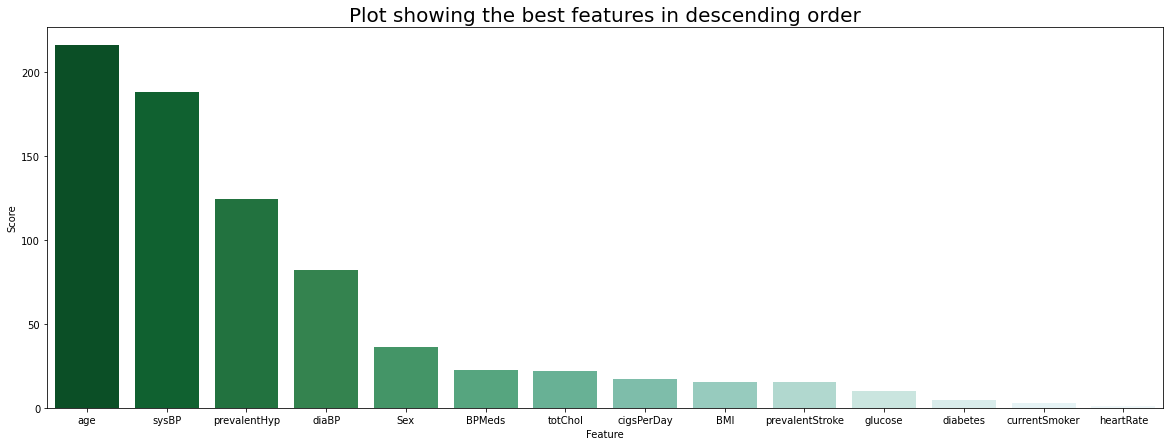

In [1264]:
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

- Plot ini menunjukkan Fitur dan skor tes f_classif masing-masing
- Hanya fitur ini yang memiliki pengaruh paling kuat terhadap variabel target.

In [1265]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['age',
 'sysBP',
 'prevalentHyp',
 'diaBP',
 'Sex',
 'BPMeds',
 'totChol',
 'cigsPerDay',
 'BMI',
 'prevalentStroke']

In [1266]:
df1_new=df1[['age','sysBP','prevalentHyp','diaBP','Sex','BPMeds','totChol','cigsPerDay','BMI','prevalentStroke','TenYearCHD']]
df1_new.head()

,age,sysBP,prevalentHyp,diaBP,Sex,BPMeds,totChol,cigsPerDay,BMI,prevalentStroke,TenYearCHD
0,39.0,-1.221126,0.0,-1.093598,1.0,0.0,-0.959027,-0.753879,0.321867,0.0,0.0
1,46.0,-0.512683,0.0,-0.146628,0.0,0.0,0.316207,-0.753879,0.771969,0.0,0.0
2,48.0,-0.205691,0.0,-0.232716,1.0,0.0,0.200277,0.923503,-0.094989,0.0,0.0
3,61.0,0.856973,1.0,1.058607,0.0,0.0,-0.263445,1.762194,0.733608,0.0,1.0
4,46.0,-0.087618,0.0,0.111637,0.0,0.0,1.127719,1.175110,-0.667846,0.0,0.0


## Resampling target Variable 

In [1267]:
# Resampling Imbalanced variabel target data 
# Resampling imbalanced dataset by oversampling positive cases
target1=df1_new[df1_new['TenYearCHD']==1]
target0=df1_new[df1_new['TenYearCHD']==0]
target1=resample(target1,replace=True,n_samples=len(target0),random_state=0)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts() 

0.0    3565
1.0    3565
Name: TenYearCHD, dtype: int64

In [1268]:
df1_final=target
np.shape(df1_final)

(7130, 11)

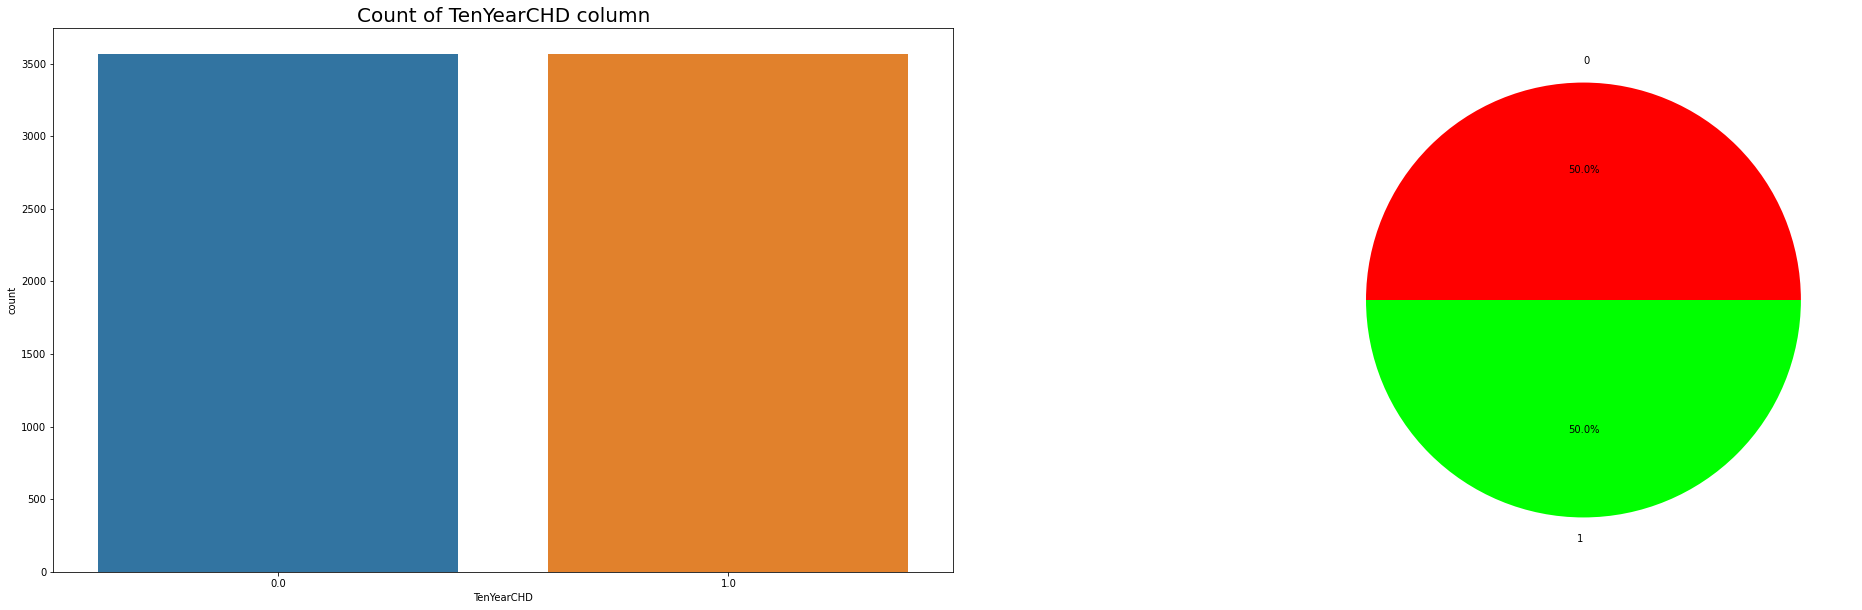

In [1273]:
plt.figure(figsize=(20, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df1_final)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df1_final["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

## Split Data to Train data and Test Data

In [1270]:
X = df1_final.drop("TenYearCHD", axis=1)
# X=df1[['Sex','age','cigsPerDay','prevalentHyp','sysBP','glucose']]
y=df1_final.TenYearCHD

# membagi data menjadi set data pelatihan dan validasi 
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression 

In [1271]:
# Logistic regression
lr = lm.LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
prediction = lr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


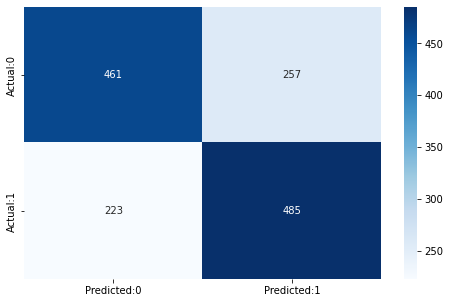

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66       718
         1.0       0.65      0.69      0.67       708

    accuracy                           0.66      1426
   macro avg       0.66      0.66      0.66      1426
weighted avg       0.66      0.66      0.66      1426



In [1272]:
cm = confusion_matrix(y_test, prediction)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, prediction))

In [1274]:
# Buat nama pengukurun
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Perhitungan dari pengukuran tersebut
def measures(preds):
    acc = accuracy_score(y_test, preds)
    pre = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1_ = f1_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    return [acc, pre, rec, f1_]

In [1277]:
# Logistic regression
lr = lm.LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
prediction = lr.predict(X_test)

# Pengukuran Logistik regression
lr_scores = measures(prediction)
cm = confusion_matrix(prediction, y_test)

# Tampilkan
print("Logistic Regression : \n")
for i, name in enumerate(metric_names):
    print(f"\t{name:10}  : {lr_scores[i]:.2f}")
print(f"\nConfusion Matrix : \n")

fig = px.imshow(cm, text_auto=True, color_continuous_scale='fall', width=400, height=400)
fig.show() 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 

	Accuracy    : 0.66
	Precision   : 0.65
	Recall      : 0.69
	F1 Score    : 0.67

Confusion Matrix : 

